<a href="https://colab.research.google.com/github/shashwat12304/Daksh/blob/main/Rnn-GRU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [75]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import mutual_info_classif
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.preprocessing import StandardScaler
import pickle

In [56]:
data = pd.read_csv('NewData.csv')

In [57]:
data.shape

(10000, 50)

In [58]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   id                                  10000 non-null  int64  
 1   NumDots                             10000 non-null  int64  
 2   SubdomainLevel                      10000 non-null  int64  
 3   PathLevel                           10000 non-null  int64  
 4   UrlLength                           10000 non-null  int64  
 5   NumDash                             10000 non-null  int64  
 6   NumDashInHostname                   10000 non-null  int64  
 7   AtSymbol                            10000 non-null  int64  
 8   TildeSymbol                         10000 non-null  int64  
 9   NumUnderscore                       10000 non-null  int64  
 10  NumPercent                          10000 non-null  int64  
 11  NumQueryComponents                  10000 

<Axes: >

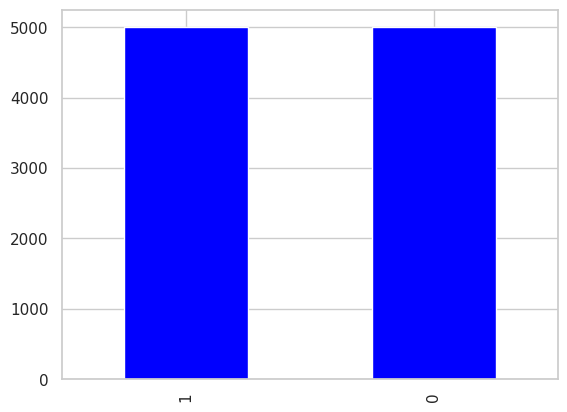

In [59]:
data['CLASS_LABEL'].value_counts().plot.bar(color='blue')

In [64]:
X = dataset.drop(columns=['id', 'CLASS_LABEL','SubdomainLevelRT','UrlLengthRT','PctExtResourceUrlsRT','AbnormalExtFormActionR','ExtMetaScriptLinkRT','PctExtNullSelfRedirectHyperlinksRT'])
y = dataset['CLASS_LABEL']
print('x:', X)
print('y:', y)

x:       NumDots  SubdomainLevel  PathLevel  UrlLength  NumDash  \
0           3               1          5         72        0   
1           3               1          3        144        0   
2           3               1          2         58        0   
3           3               1          6         79        1   
4           3               0          4         46        0   
...       ...             ...        ...        ...      ...   
9995        3               1          1         50        0   
9996        2               1          4         59        1   
9997        2               1          4         57        0   
9998        3               1          1         49        0   
9999        3               1          2         52        3   

      NumDashInHostname  AtSymbol  TildeSymbol  NumUnderscore  NumPercent  \
0                     0         0            0              0           0   
1                     0         0            0              2           0 

In [65]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [67]:
model = Sequential([
    GRU(64, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    Dropout(0.2),
    GRU(64),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

In [68]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [69]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_6 (GRU)                 (None, 42, 64)            12864     
                                                                 
 dropout_6 (Dropout)         (None, 42, 64)            0         
                                                                 
 gru_7 (GRU)                 (None, 64)                24960     
                                                                 
 dropout_7 (Dropout)         (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 37,889
Trainable params: 37,889
Non-trainable params: 0
_________________________________________________________________


In [70]:
X_train_reshaped = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_reshaped = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [71]:
history = model.fit(X_train_reshaped, y_train, batch_size=64, epochs=10, validation_data=(X_test_reshaped, y_test))

Epoch 1/10
125/125 [==============================] - 14s 80ms/step - loss: 0.4972 - accuracy: 0.7466 - val_loss: 0.3650 - val_accuracy: 0.8240
Epoch 2/10
125/125 [==============================] - 10s 77ms/step - loss: 0.3305 - accuracy: 0.8503 - val_loss: 0.3090 - val_accuracy: 0.8610
Epoch 3/10
125/125 [==============================] - 7s 56ms/step - loss: 0.2870 - accuracy: 0.8785 - val_loss: 0.2671 - val_accuracy: 0.8855
Epoch 4/10
125/125 [==============================] - 8s 67ms/step - loss: 0.2671 - accuracy: 0.8926 - val_loss: 0.2494 - val_accuracy: 0.8995
Epoch 5/10
125/125 [==============================] - 8s 65ms/step - loss: 0.2447 - accuracy: 0.9091 - val_loss: 0.2468 - val_accuracy: 0.8935
Epoch 6/10
125/125 [==============================] - 7s 56ms/step - loss: 0.2334 - accuracy: 0.9125 - val_loss: 0.2135 - val_accuracy: 0.9150
Epoch 7/10
125/125 [==============================] - 8s 64ms/step - loss: 0.2183 - accuracy: 0.9194 - val_loss: 0.1985 - val_accuracy: 0.91

In [72]:
loss, accuracy = model.evaluate(X_test_reshaped, y_test)
print(f"Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}")

63/63 [==============================] - 1s 14ms/step - loss: 0.1670 - accuracy: 0.9340
Test Loss: 0.1670, Test Accuracy: 0.9340


In [73]:
X_test_reshaped = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [74]:
y_pred = model.predict(X_test_reshaped)
y_pred = np.round(y_pred)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

data = {'num_of_features': [X_test.shape[1]],
        'precision': [precision],
        'recall': [recall],
        'f1_score': [f1],
        'accuracy': [accuracy]}

df = pd.DataFrame(data)

print(df)

63/63 [==============================] - 3s 15ms/step
   num_of_features  precision    recall  f1_score  accuracy
0               42   0.929688  0.940711  0.935167     0.934


In [80]:
with open('rnn_gru_model.pkl', 'wb') as file:
    pickle.dump(model, file)

with open('rnn_gru_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

y_pred_loaded = loaded_model.predict(X_test_reshaped)
y_pred_loaded = np.round(y_pred_loaded)

63/63 [==============================] - 4s 25ms/step


In [81]:
print(y_pred_loaded)

[[0.]
 [1.]
 [1.]
 ...
 [0.]
 [1.]
 [0.]]
